In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [8]:
df.dropna(inplace=True)

In [15]:
#Describe about Age , Orders and Amount of Dataframe
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


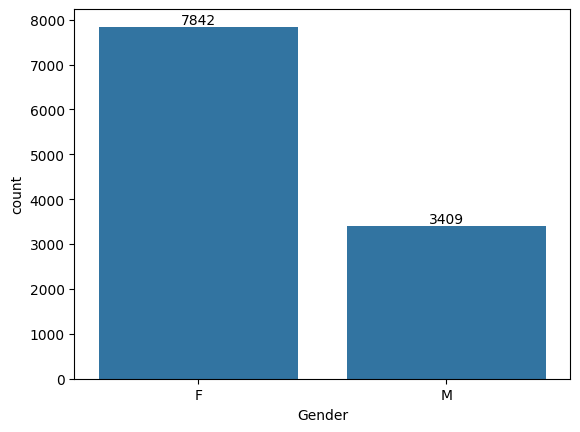

In [16]:
# Create a count plot for the 'Gender' column of the DataFrame 'df'
ax = sns.countplot(x = 'Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men



In [20]:
 df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<Axes: xlabel='Gender', ylabel='Amount'>

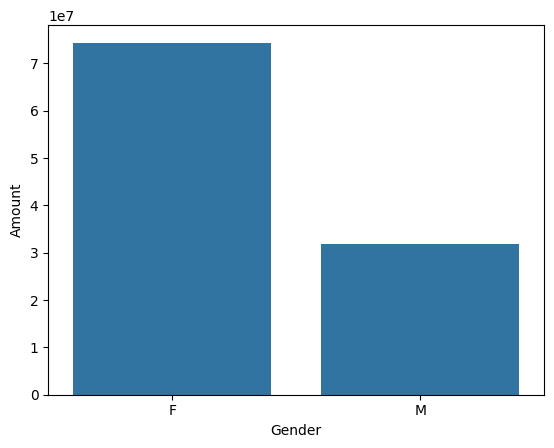

In [19]:
# Group the DataFrame 'df' by the 'Gender' column and calculate the sum of 'Amount' for each gender.
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

In [21]:
df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Age Group,Amount
2,26-35,42613443.94
3,36-45,22144995.49
1,18-25,17240732.00
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00
0,0-17,2699653.00


<Axes: xlabel='Age Group', ylabel='Amount'>

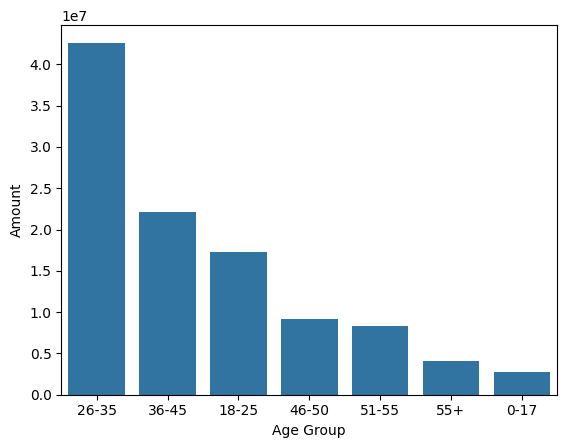

In [24]:
# This code snippet calculates the total sales amount for each age groupfrom the DataFrame 'df'.
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female



In [ ]:
 df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

In [ ]:
#Top 10 states with maximum order count
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

In [34]:
 df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

,State,Amount
14,Uttar Pradesh,19374968.00
10,Maharashtra,14427543.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00
0,Andhra Pradesh,8037146.99
5,Himachal Pradesh,4963368.00
4,Haryana,4220175.00
1,Bihar,4022757.00
3,Gujarat,3946082.00


<Axes: xlabel='State', ylabel='Amount'>

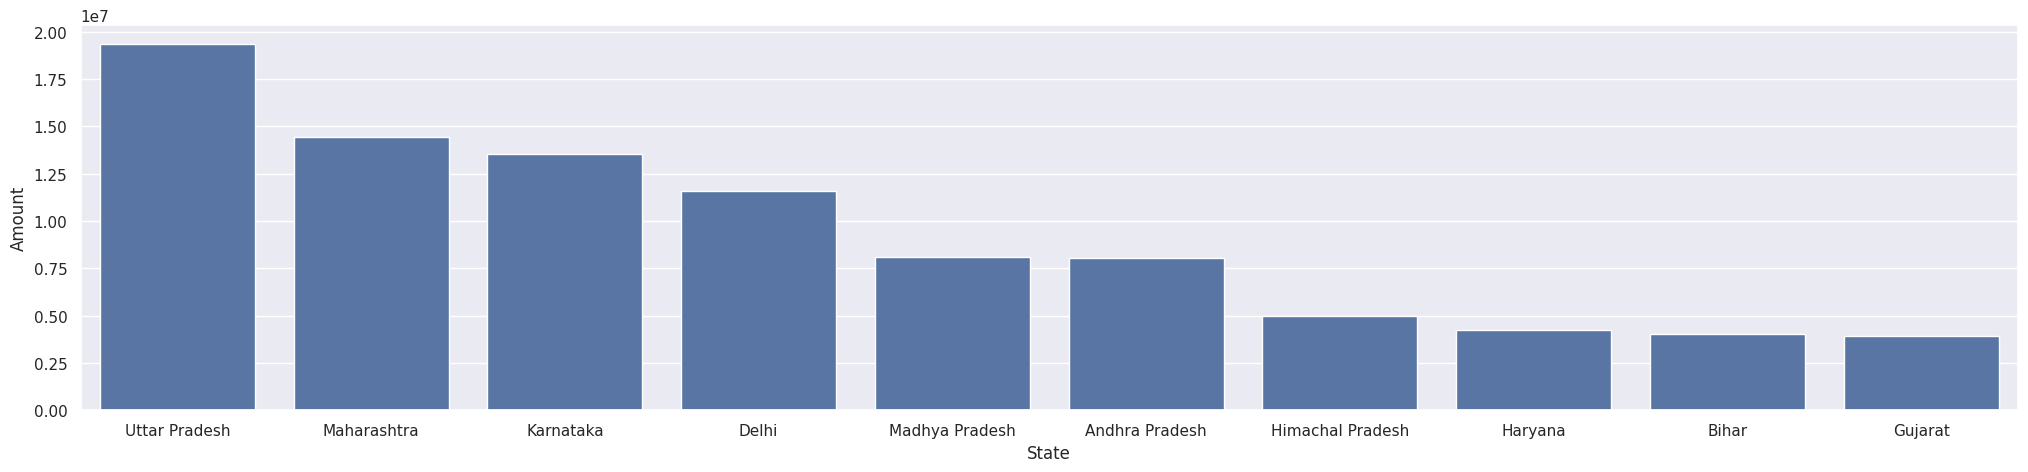

In [33]:
#Top 10 states with maximum Amount Spend

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

In [35]:
 df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16495019.00
5,Electronics & Gadgets,15643846.00
7,Footwear & Shoes,15575209.45
8,Furniture,5440051.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1958609.99
15,Stationery,1676051.50


<Axes: xlabel='Product_Category', ylabel='Amount'>

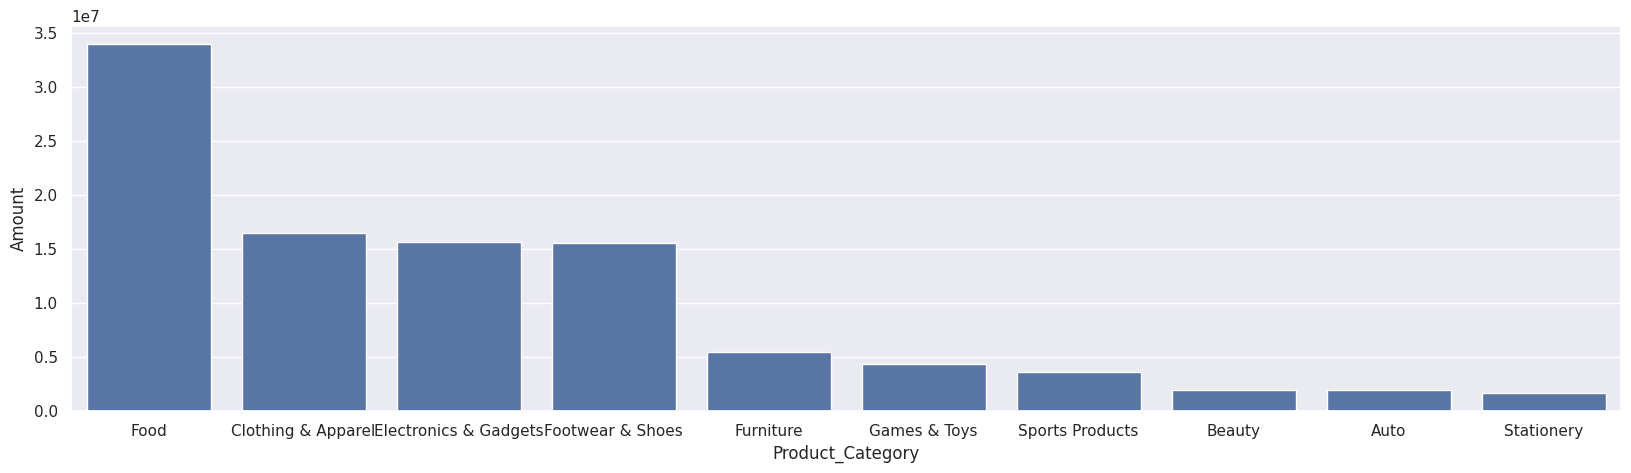

In [36]:
#Top 10 Product Category with maximum amount Spend
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')